# Merge All Data

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import skew, kurtosis
import matplotlib.pyplot as plt
import seaborn as sns
import sys
sys.path.append("../src")

from load_data import merge_all

In [2]:
df = merge_all()
df.head()

,ce_1,ce_2,ce_3,ce_4,ce_5,ce_6,ce_7,ce_8,ce_9,ce_10,...,vs1_56,vs1_57,vs1_58,vs1_59,vs1_60,cooler,valve,leakage,acc,stable
0,47.202,47.273,47.250,47.332,47.213,47.372,47.273,47.438,46.691,46.599,...,0.539,0.544,0.545,0.535,0.543,3,100,0,130,1
1,29.208,28.822,28.805,28.922,28.591,28.643,28.216,27.812,27.514,27.481,...,0.542,0.540,0.533,0.531,0.534,3,100,0,130,1
2,23.554,23.521,23.527,23.008,23.042,23.052,22.658,22.952,22.908,22.359,...,0.544,0.545,0.544,0.530,0.534,3,100,0,130,1
3,21.540,21.419,21.565,20.857,21.052,21.039,20.926,20.912,20.989,20.882,...,0.555,0.544,0.543,0.543,0.542,3,100,0,130,1
4,20.460,20.298,20.350,19.867,19.997,19.972,19.924,19.813,19.691,19.634,...,0.540,0.549,0.542,0.533,0.537,3,100,0,130,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Columns: 43685 entries, ce_1 to stable
dtypes: float64(43646), int64(39)
memory usage: 734.9 MB


In [4]:
df.describe()

,ce_1,ce_2,ce_3,ce_4,ce_5,ce_6,ce_7,ce_8,ce_9,ce_10,...,vs1_56,vs1_57,vs1_58,vs1_59,vs1_60,cooler,valve,leakage,acc,stable
count,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,...,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000,2205.000000
mean,31.325613,31.364606,31.395767,31.402451,31.395373,31.371016,31.351265,31.339065,31.307852,31.238561,...,0.575380,0.573558,0.572564,0.571495,0.574633,41.240816,90.693878,0.669388,107.199546,0.342857
std,11.532175,11.512519,11.504075,11.504153,11.521065,11.539150,11.566626,11.579167,11.571700,11.538494,...,0.051016,0.050397,0.049652,0.049362,0.049312,42.383143,10.681802,0.817233,16.435848,0.474772
min,17.356000,17.552000,17.440000,17.416000,17.392000,17.404000,17.456000,17.396000,17.506000,17.364000,...,0.495000,0.495000,0.499000,0.495000,0.501000,3.000000,73.000000,0.000000,90.000000,0.000000
25%,20.165000,20.260000,20.333000,20.387000,20.367000,20.328000,20.240000,20.149000,20.113000,20.071000,...,0.535000,0.534000,0.534000,0.533000,0.537000,3.000000,80.000000,0.000000,90.000000,0.000000
50%,27.334000,27.397000,27.446000,27.455000,27.424000,27.384000,27.356000,27.351000,27.351000,27.313000,...,0.573000,0.570000,0.569000,0.567000,0.571000,20.000000,100.000000,0.000000,100.000000,0.000000
75%,46.651000,46.675000,46.690000,46.686000,46.693000,46.686000,46.711000,46.698000,46.678000,46.544000,...,0.595000,0.592000,0.591000,0.590000,0.592000,100.000000,100.000000,1.000000,130.000000,1.000000
max,48.136000,48.057000,48.124000,48.112000,48.159000,48.253000,48.158000,48.219000,48.146000,48.040000,...,0.865000,0.871000,0.867000,0.868000,0.873000,100.000000,100.000000,2.000000,130.000000,1.000000


# Exploratory Data Analysis

1: Cooler condition / %:
	3: close to total failure
	20: reduced effifiency
	100: full efficiency

2: Valve condition / %:
	100: optimal switching behavior
	90: small lag
	80: severe lag
	73: close to total failure

3: Internal pump leakage:
	0: no leakage
	1: weak leakage
	2: severe leakage

4: Hydraulic accumulator / bar:
	130: optimal pressure
	115: slightly reduced pressure
	100: severely reduced pressure
	90: close to total failure

5: stable flag:
	0: conditions were stable
	1: static conditions might not have been reached yet

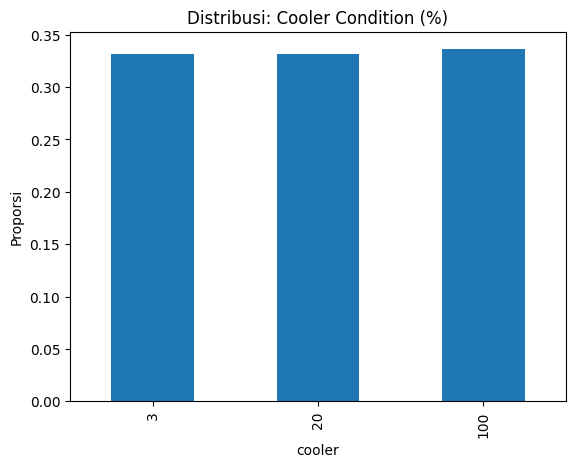

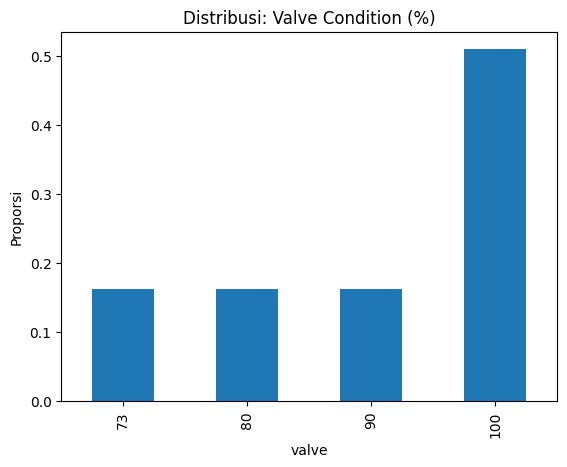

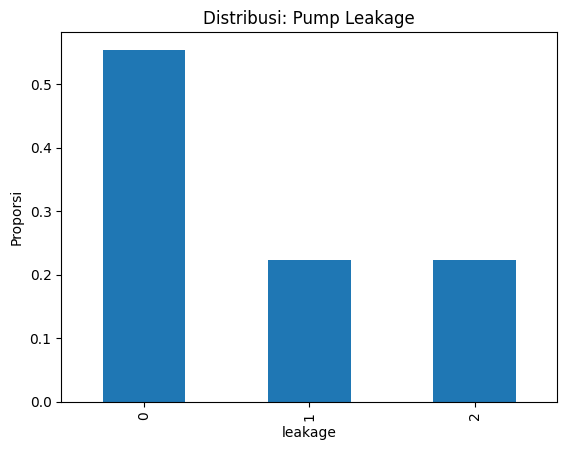

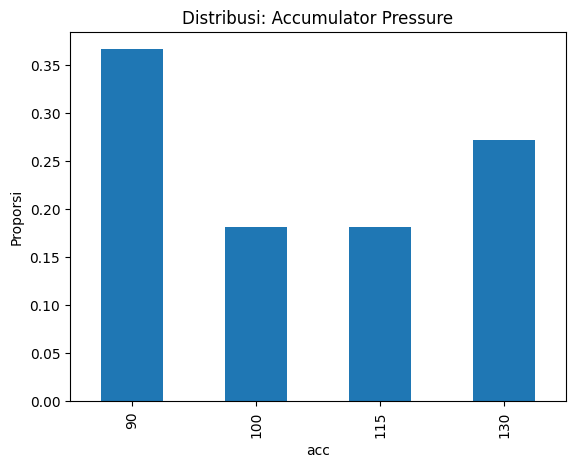

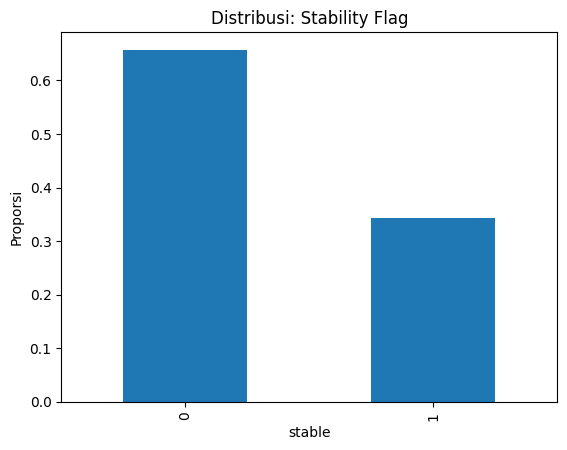

In [5]:
# Distibutions of Target Variables
targets = {
    'Cooler Condition (%)': 'cooler',
    'Valve Condition (%)': 'valve',
    'Pump Leakage': 'leakage',
    'Accumulator Pressure': 'acc',
    'Stability Flag': 'stable'
}

for label, col in targets.items():
    df[col].value_counts(normalize=True).sort_index().plot(kind='bar')
    plt.title(f"Distribusi: {label}")
    plt.ylabel('Proporsi')
    plt.show()


Contoh Visualisasi Feature terhadap Target

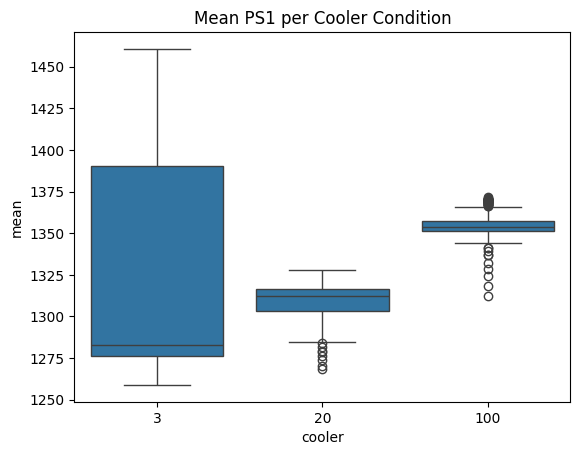

In [6]:
# PS1 Statistics
df_ps1_stats = df.filter(like='ps1_').agg(['mean', 'std', 'max'], axis=1)
df_ps1_stats['cooler'] = df['cooler']

sns.boxplot(data=df_ps1_stats, x='cooler', y='mean')
plt.title('Mean PS1 per Cooler Condition')
plt.show()

# Feature Engineering

In [8]:
# Feature Engineering

# Asumsikan df sudah berisi seluruh data sensor + profile
sensor_cols = [col for col in df.columns if not col in ['cooler', 'valve', 'leakage', 'acc', 'stable']]

# Deteksi nama sensor unik (misal: ps1, ps2, ...), asumsikan format kolom: sensor_x
sensor_names = sorted(set(col.split('_')[0] for col in sensor_cols))

feature_list = []

for sensor in sensor_names:
    sensor_related = [col for col in sensor_cols if col.startswith(sensor + '_')]
    sensor_df = df[sensor_related]
    stat_df = pd.DataFrame()
    stat_df[f"{sensor}_mean"] = sensor_df.mean(axis=1)
    stat_df[f"{sensor}_std"] = sensor_df.std(axis=1)
    stat_df[f"{sensor}_min"] = sensor_df.min(axis=1)
    stat_df[f"{sensor}_max"] = sensor_df.max(axis=1)
    stat_df[f"{sensor}_skew"] = sensor_df.apply(skew, axis=1)
    stat_df[f"{sensor}_kurtosis"] = sensor_df.apply(kurtosis, axis=1)
    feature_list.append(stat_df)

# Gabungkan semua fitur statistik sensor
features_df = pd.concat(feature_list, axis=1)

# Gabungkan dengan label
profile_cols = ['cooler', 'valve', 'leakage', 'acc', 'stable']
final_df = pd.concat([features_df, df[profile_cols]], axis=1)

print("Shape final dataset:", final_df.shape)

Shape final dataset: (2205, 107)


In [10]:
final_df.to_csv('processed_dataset.csv', index=False)